# ODE integrators II: implicit and symplectic methods

## Numerical Stability of Integrators

Numerical Stability in the context of Ordinary Differential Equation (ODE) solvers refers to the ability of a numerical method to control the growth of errors introduced during the iterative process of approximation.
A method is considered stable if the numerical errors do not amplify uncontrollably as computations proceed.
This concept is crucial for ensuring that the numerical solution remains meaningful and behaves similarly to the true solution, especially over long integration intervals.

### Definition and Importance

A numerical method is stable for a given problem if the errors---whether from truncation or round-off---do not grow exponentially with each time step.
Stability ensures that the numerical solution does not diverge from the true solution due to the accumulation of numerical errors.
This is particularly important in long-term simulations where even small errors can accumulate to produce significant deviations from the true behavior of the system.

### Stability vs. Accuracy

It's essential to distinguish between stability and accuracy:
* Stability: Pertains to the boundedness of errors over time.
  A stable method ensures that errors remain controlled and do not grow exponentially, preventing the solution from becoming meaningless.
* Accuracy: Refers to how closely the numerical solution approximates the exact solution.
  An accurate method minimizes the difference between the numerical and true solutions.

A method can be stable but not accurate, meaning it controls error growth but doesn't closely follow the exact solution.
Conversely, a method can be accurate but unstable, producing precise results initially but diverging over time due to uncontrolled error growth.
For reliable numerical solutions, both stability and accuracy are required.

### Stability Regions for Explicit Methods

To analyze the stability of numerical integrators, we commonly use the linear test equation introduced in previous lectures:
\begin{align}
\frac{dx}{dt} = \lambda x
\end{align}
where $\lambda \in \mathbb{C}$.
The exact solution to this ODE is:
\begin{align}
x(t) = x_0 e^{\lambda t}.
\end{align}
For a numerical method to be stable when applied to this equation, it must ensure that the numerical errors do not grow exponentially.
This is evaluated using the concept of the **stability region**.

### Forward Euler Method Stability

In [ODE I](../14/notes.ipynb), we learned that the Forward Euler method is the simplest explicit numerical integrator for solving ODEs.
Its update formula for the linear test equation is derived as follows:

Starting with the Forward Euler update:
\begin{align}
x_{n+1} = x_n + \Delta t \cdot f(x_n, t_n)
\end{align}
For the linear test equation $f(x, t) = \lambda x$, this becomes:
\begin{align}
x_{n+1} = x_n + \Delta t \cdot \lambda x_n = (1 + \lambda \Delta t) x_n
\end{align}
Here, the amplification factor $R(z)$ is defined as:
\begin{align}
R(z) = 1 + z \quad \text{where} \quad z = \lambda \Delta t
\end{align}
The stability condition requires that:
\begin{align}
|R(z)| \leq 1
\end{align}
Substituting the amplification factor:
\begin{align}
|1 + z| \leq 1
\end{align}
This condition defines the stability region for the Forward Euler method.

To better understand the stability regions, we can visualize them in the complex plane.
The stability region for Forward Euler is a circle centered at $(-1, 0)$ with a radius of 1.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Define the grid for the complex plane
Re = np.linspace(-3, 3, 601)
Im = np.linspace(-3, 3, 601)
Re, Im = np.meshgrid(Re, Im)
Z = Re + 1j * Im

# Forward Euler stability condition |1 + Z| <= 1
abs_R_fE = np.abs(1 + Z)

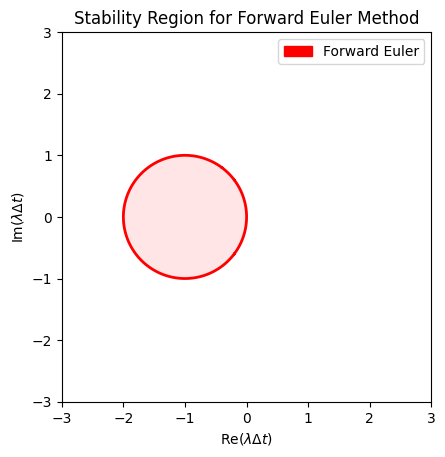

In [3]:
# Plotting
plt.contour (Re, Im, abs_R_fE, levels=[1],    colors=['red'], linewidths=2, linestyles='-')
plt.contourf(Re, Im, abs_R_fE, levels=[0, 1], colors=['red'], alpha=0.1)

plt.title('Stability Region for Forward Euler Method')
plt.xlabel(r'Re($\lambda \Delta t$)')
plt.ylabel(r'Im($\lambda \Delta t$)')
plt.gca().set_aspect('equal')

# Adding legend manually
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='red', label='Forward Euler')
plt.legend(handles=[blue_patch])

The stability region plot leads to:
* The Forward Euler method is conditionally stable, meaning it is only stable within a specific region of the complex plane.
* Specifically, it is stable for values of $\lambda \Delta t$ that lie within the circle centered at $(-1, 0)$ with a radius of 1.
* For real positive $\lambda$ (i.e., $\lambda > 0$), the Forward Euler method becomes **unconditionally unstable** because such values fall outside the stability region.
  This implies that even with small time steps, the method cannot control error growth for these cases.

The implication is:
* When dealing with ODEs where $\lambda > 0$, especially in stiff equations, the Forward Euler method may lead to solutions that diverge from the true behavior due to uncontrolled error amplification.
* This limitation necessitates the use of more stable methods, such as implicit integrators, which will be discussed in subsequent sections.

### Stability Analysis Using Simple Harmonic Oscillator

From the previous lecture [ODE I](ode1.md), we also solved the simple harmonic oscillator:
\begin{align}
\frac{d}{dt}\begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix} =
\begin{bmatrix} \Omega(t) \\ -\frac{g}{l} \theta(t) \end{bmatrix} =
\begin{bmatrix} 0 & 1 \\ -\frac{g}{l} & 0 \end{bmatrix}
\begin{bmatrix} \theta(t) \\ \Omega(t) \end{bmatrix}
\end{align}
using the forward Euler method:
\begin{align}
\begin{bmatrix} \theta_{n+1} \\ \Omega_{n+1} \end{bmatrix} =
\begin{bmatrix} \theta_{n} \\ \Omega_{n} \end{bmatrix} +
\begin{bmatrix} 0 & 1 \\ -\frac{g}{l} & 0 \end{bmatrix}
\begin{bmatrix} \theta_{n} \\ \Omega_{n} \end{bmatrix} =
\begin{bmatrix} 1 & \Delta t \\ -\frac{g}{l}\Delta t & 1 \end{bmatrix}
\begin{bmatrix} \theta_{n} \\ \Omega_{n} \end{bmatrix}
\end{align}
The "amplification factor" is no longer a scalar but a matrix.
The stability condition $|R| \le 1$ become
\begin{align}
\det \begin{bmatrix} 1 & \Delta t \\ -\frac{g}{l}\Delta t & 1 \end{bmatrix} \le 1.
\end{align}
Hence,
\begin{align}
\frac{g}{l}\Delta t^2 \le 0
\end{align}
which canno be satisfied.
The forward Euler method is therefore again unconditional unstable.

### Stability Regions for RK2 and RK4 Methods

Beyond the Forward Euler method, higher-order explicit Runge-Kutta (RK) methods like RK2 and RK4 offer improved accuracy while maintaining conditional stability.
However, their stability regions differ from that of the Forward Euler method, allowing for larger regions of stability in the complex plane.
Understanding these stability regions is essential for selecting appropriate numerical methods based on the problem's characteristics.

* RK2 Stability Function:
  For the classical RK2 method (Heun’s method), the stability function is given by:
  \begin{align}
  R_{\text{RK2}}(z) = 1 + z + \frac{1}{2} z^2
  \end{align}

* RK4 Stability Function:
  For the classical RK4 method, the stability function is more complex:
  \begin{align}
  R_{\text{RK4}}(z) = 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4
  \end{align}

These stability functions indicate how each method propagates errors over time steps, affecting the overall stability of the numerical solution.

In [ ]:
def R_RK2(z):
    """Stability function for RK2"""
    return 1 + z + 0.5 * z**2

def R_RK4(z):
    """Stability function for RK4 (classical Runge-Kutta)"""
    return 1
    + z + 0.5 * z**2 + (1/6) * z**3 + (1/24) * z**4

# Compute |R(z)| for each method
abs_R_RK2 = np.abs(R_RK2(Z))
abs_R_RK4 = np.abs(R_RK4(Z))

In [ ]:
# Define a list of methods and their corresponding data
methods = {
    'Forward Euler':   abs_R_fE,
    'RK2 ':            abs_R_RK2,
    'RK4 (Classical)': abs_R_RK4,
}

# Plot stability regions for each method
colors = ['red', 'green', 'blue']
for idx, (title, abs_R) in enumerate(methods.items()):
    # Contour where |R(z)| = 1
    plt.contour(Re, Im, abs_R, levels=[1], colors=colors[idx], linewidths=2, linestyles='-')
    # Fill the stability region
    plt.contourf(Re, Im, abs_R, levels=[0, 1], colors=[colors[idx]], alpha=0.1)

plt.title('Stability Regions for Forward Euler, RK2, and RK4 Methods')
plt.xlabel(r'Re($\lambda \Delta t$)')
plt.ylabel(r'Im($\lambda \Delta t$)')
plt.gca().set_aspect('equal')

# Adding legend manually
patches = []
for idx, title in enumerate(methods.keys()):
    patches.append(mpatches.Patch(color=colors[idx], label=title))
plt.legend(handles=patches)

The above plot suggests:
* RK2 (Green):
  * Stability Region: Larger than Forward Euler but still bounded.
  * Extended Stability: Allows for slightly larger time steps while maintaining stability.
* RK4 (Classical) (Blue):
  * Stability Region: Even larger than RK2, encompassing a more extensive area in the complex plane.
  * Greater Stability: Facilitates larger time steps compared to Forward Euler and RK2.

Some key observations include:
* Order vs. Stability: Higher-order methods like RK2 and RK4 generally have larger stability regions compared to lower-order methods like Forward Euler.
  This allows them to take larger time steps while maintaining stability.
* Still Conditionally Stable: Despite their larger stability regions, RK2 and RK4 are still conditionally stable.
  They are not A-stable, meaning they cannot remain stable for all values of  $\lambda \Delta t$ in the left half of the complex plane.

In terms of trade-offs:
* Forward Euler: Simple and easy to implement but has a very limited stability region.
* RK2 and RK4: More complex and computationally intensive due to additional stages but offer better stability and accuracy.

In this section, we extended our analysis of stability regions to include higher-order explicit Runge-Kutta methods: RK2 and RK4 (classical Runge-Kutta).
Both methods exhibit larger stability regions compared to the Forward Euler method, allowing for greater flexibility in choosing time steps while maintaining stability.
However, they remain conditionally stable, meaning their stability depends on the specific characteristics of the ODE being solved and the chosen time step.

Understanding the stability regions of these methods is essential for selecting the appropriate numerical integrator based on the problem's nature.
While RK2 and RK4 offer improved stability and accuracy, they still require careful consideration of the time step to ensure that the numerical solution remains stable and accurate.

### Implicit Methods

In the realm of numerical ODE solvers, methods are broadly classified into explicit and implicit integrators based on how they compute the next state of the system.

Explicit Methods:
* Definition: Compute the state of the system at the next time step solely based on information from the current and previous steps.
* Example: Forward Euler Method.
* Advantages:
  * Simplicity and ease of implementation.
  * Computational efficiency for non-stiff problems.
* Disadvantages:
  * Limited stability regions, making them unsuitable for stiff ODEs without very small time steps.
  * Potential for instability and error amplification in certain scenarios.

Implicit Methods:
* Definition: Compute the state of the system at the next time step based on both current and future information, often requiring the solution of equations that involve the unknown future state.
* Example: Backward Euler Method.
* Advantages:
  * Larger stability regions, making them suitable for stiff ODEs.
  * Enhanced stability allows for larger time steps without sacrificing solution quality.
* Disadvantages:
  * Increased computational complexity due to the need to solve nonlinear equations at each step.
  * More involved implementation, especially for complex or high-dimensional systems.

The main reasons to use implicit methods include:
* Stiff ODEs: Systems with rapidly decaying components alongside slower dynamics.
  Explicit methods require prohibitively small time steps for stability, whereas implicit methods can handle larger steps efficiently.
* Enhanced Stability: Implicit methods can remain stable for a broader range of problems and time steps, making them indispensable for certain applications in physics, engineering, and other fields.

Understanding the distinction between implicit and explicit methods is fundamental for selecting the appropriate numerical integrator based on the characteristics of the ODE being solved.

### Backward Euler Method

The Backward Euler method is one of the simplest implicit methods.
It offers enhanced stability properties compared to its explicit counterpart, making it suitable for stiff ODEs.

Given an ODE:
\begin{align}
\frac{dx}{dt} = f(x, t), \quad x(t_0) = x_0
\end{align}
The Backward Euler update formula is derived by evaluating the derivative at the next time step $t_{n+1} = t_n + \Delta t$:
\begin{align}
x_{n+1} = x_n + \Delta t \cdot f(x_{n+1}, t_{n+1})
\end{align}
Unlike explicit methods, $x_{n+1}$ appears on both sides of the equation, necessitating the solution of this equation at each time step.

### Stability Analysis

Using the linear test equation $\frac{dx}{dt} = \lambda x$, where $\lambda \in \mathbb{C}$, the Backward Euler update becomes:
\begin{align}
x_{n+1} = x_n + \Delta t \cdot \lambda x_{n+1}
\end{align}
Solving for $x_{n+1}$:
\begin{align}
x_{n+1} = \frac{x_n}{1 - \lambda \Delta t}
\end{align}
The amplification factor $R(z)$ is therefore:
\begin{align}
R(z) = \frac{1}{1 - z} \quad \text{where} \quad z = \lambda \Delta t
\end{align}

The stability condition requires:
\begin{align}
|R(z)| = \left| \frac{1}{1 - z} \right| \leq 1
\end{align}
For the method to be stable, the above condition must hold.
Analyzing this:
* A-Stability: A numerical method is A-stable if it is stable for all $\lambda \Delta t$ with $\text{Re}(\lambda) \leq 0$.
  The Backward Euler method satisfies this condition, making it A-stable.
* Implications for Stiff ODEs: The A-stability of the Backward Euler method allows it to handle stiff ODEs effectively, enabling larger time steps without sacrificing stability.

In [ ]:
def R_bE(z):
    """Stability function for backward Euler"""
    return 1 / (1 - z)

# Compute |R(z)| for each method
abs_R_bE = np.abs(R_bE(Z))

In [ ]:
# Define a list of methods and their corresponding data
methods = {
    'Forward Euler':   abs_R_fE,
    'Backward Euler':  abs_R_bE,
    'RK2':             abs_R_RK2,
    'RK4 (Classical)': abs_R_RK4,
}

# Plot stability regions for each method
colors = ['red', 'yellow', 'green', 'blue']
for idx, (title, abs_R) in enumerate(methods.items()):
    # Contour where |R(z)| = 1
    plt.contour(Re, Im, abs_R, levels=[1], colors=colors[idx], linewidths=2, linestyles='-')
    # Fill the stability region
    plt.contourf(Re, Im, abs_R, levels=[0, 1], colors=[colors[idx]], alpha=0.1)

plt.title('Stability Regions for Forward Euler, RK2, and RK4 Methods')
plt.xlabel(r'Re($\lambda \Delta t$)')
plt.ylabel(r'Im($\lambda \Delta t$)')
plt.gca().set_aspect('equal')

# Adding legend manually
patches = []
for idx, title in enumerate(methods.keys()):
    patches.append(mpatches.Patch(color=colors[idx], label=title))
plt.legend(handles=patches)

Implementing the Backward Euler method involves solving the implicit equation at each time step.
The approach varies depending on whether the ODE is linear or nonlinear.

* Linear ODEs: If $f(x, t)$ is linear in $x$, the implicit equation can often be solved directly without iterative methods.
  For example, for $dx/dt = \lambda x$:
  \begin{align}
  x_{n+1} = (1 - \lambda \Delta t)^{-1} x_n.
  \end{align}
  Using matrix inverse, the above formulation even works for system of linear ODEs.

* Nonlinear ODEs: If $f(x, t)$ is nonlinear, solving for $x_{n+1}$ typically requires iterative methods such as the [Newton-Raphson method](opt.md).
  Python's fsolve from the scipy.optimize library can be used for this purpose.

## Stiff ODEs

Let's implement the Backward Euler method for a simple linear ODE and compare it with the Forward Euler method.

Consider the ODE:
\begin{align}
\frac{dx}{dt} = -1000x + 3000 - 2000e^{-t}, \quad x(0) = 0
\end{align}
The exact solution is:
\begin{align}
x(t) = 3 - 0.998 e^{-1000t} - 2.002 e^{-t}
\end{align}
This ODE is stiff because it contains terms with vastly different decay rates ($e^{-1000t}$ vs. $e^{-t}$).

In [ ]:
# Define the stiff ODE
def stiff_ode(x, t):
    return -1000 * x + 3000 - 2000 * np.exp(-t)

In [ ]:
# Define the exact solution for comparison
def exact_solution(t):
    return 3 - 0.998 * np.exp(-1000 * t) - 2.002 * np.exp(-t)

In [ ]:
# Forward Euler Method (for comparison)
def forward_euler(f, x0, t0, tf, dt):
    T = np.arange(t0, tf + dt, dt)
    X = [x0]

    for i in range(1, len(T)):
        t = T[i-1]
        x = X[i-1] + dt * f(X[i-1], t)
        X.append(x)

    return T, X

In [ ]:
from scipy.optimize import fsolve

# Backward Euler Method
def backward_euler(f, x0, t0, tf, dt):
    T = np.arange(t0, tf + dt, dt)
    X = [x0]

    for i in range(1, len(T)):
        t = T[i]

        # Define the implicit equation: x_next = x_current + dt * f(x_next, t_next)
        func = lambda x: x - X[i-1] - dt * f(x, t)
        # Initial guess: Forward Euler estimate
        x0 = X[i-1] + dt * f(X[i-1], t)
        # Solve for x_next using Newton-Raphson (fsolve)
        x  = fsolve(func, x0)[0]
        
        X.append(x)

    return T, X

In [ ]:
# Parameters
x0 = 0
t0 = 0
tf = 0.01 # Short time to observe stiffness effects
dt = 0.002

# Solve using Forward Euler
T_fE, X_fE = forward_euler(stiff_ode, x0, t0, tf, dt)

# Solve using Backward Euler
T_bE, X_bE = backward_euler(stiff_ode, x0, t0, tf, dt)

# Exact solution
T = np.linspace(t0, tf, 1000)
X = exact_solution(T)

In [ ]:
# Plotting
plt.plot(T,    X,    'k-',  label='Exact Solution')
plt.plot(T_fE, X_fE, 'r-o', label='Forward Euler')
plt.plot(T_bE, X_bE, 'b-o', label='Backward Euler')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)

From the plot, we observe:
* Forward Euler Method:
  * Behavior: Exhibits rapid oscillations and diverges from the exact solution, highlighting instability.
  * Reason: The Forward Euler method is unstable for stiff ODEs, as the required stability condition imposes prohibitively small time steps.
* Backward Euler Method:
  * Behavior: Accurately follows the exact solution without oscillations, demonstrating stability even with relatively larger time steps.
  * Reason: The implicit formulation dampens the effects of stiff terms, maintaining stability.

### Implicit Midpoint Method

The Implicit Midpoint Method is another implicit integrator that offers second-order accuracy and possesses symplectic properties, making it suitable for certain classes of ODEs, particularly those arising from Hamiltonian systems.

Given an ODE:
\begin{align}
\frac{dx}{dt} = f(x, t), \quad x(t_0) = x_0
\end{align}
The Implicit Midpoint Method updates the solution as follows:
\begin{align}
x_{n+1} = x_n + \Delta t \cdot f\left( \frac{x_n + x_{n+1}}{2}, t_n + \frac{\Delta t}{2} \right)
\end{align}

This method evaluates the derivative at the midpoint between the current and next states, enhancing its accuracy compared to the Backward Euler method.

### Stability Properties

Similar to the Backward Euler method, the Implicit Midpoint Method is A-stable, meaning it remains stable for all $\lambda \Delta t$ with $\text{Re}(\lambda) \leq 0$.
Additionally, the Implicit Midpoint Method is symplectic, making it particularly valuable for preserving the geometric properties of Hamiltonian systems over long simulations.

To obtain the stability region, we use the test problem:
\begin{align}
x_{n+1} &= x_n + \Delta t\cdot\lambda \left(\frac{x_{n+1} + x_n}{2}\right) \\
\left(1 - \frac{\Delta t\cdot\lambda}{2}\right) x_{n+1} &=
\left(1 + \frac{\Delta t\cdot\lambda}{2}\right) x_n \\
x_{n+1} &= \frac{1 + \Delta t\cdot\lambda/2}{1 + \Delta t\cdot\lambda/2} x_n
\end{align}
Therefore, the amplification factor is
\begin{align}
R(z) = \left|\frac{2 + z}{2 - z}\right|
\end{align}

In [ ]:
def R_im(z):
    """Stability function for implicit mid-point"""
    return (2 + z) / (2 - z)

# Compute |R(z)| for each method
abs_R_im = np.abs(R_im(Z))

In [ ]:
# Define a list of methods and their corresponding data
methods = {
    'Forward Euler':      abs_R_fE,
    'Backward Euler':     abs_R_bE,
    'RK2':                abs_R_RK2,
    'implicit mid-point': abs_R_im,
    'RK4 (Classical)':    abs_R_RK4,
}

plt.figure(figsize=(10, 8))

# Plot stability regions for each method
colors = ['red', 'yellow', 'green', 'cyan', 'blue']
for idx, (title, abs_R) in enumerate(methods.items()):
    # Contour where |R(z)| = 1
    plt.contour(Re, Im, abs_R, levels=[1], colors=colors[idx], linewidths=2, linestyles='-')
    # Fill the stability region
    plt.contourf(Re, Im, abs_R, levels=[0, 1], colors=[colors[idx]], alpha=0.1)

plt.title('Stability Regions for Forward Euler, RK2, and RK4 Methods')
plt.xlabel(r'Re($\lambda \Delta t$)')
plt.ylabel(r'Im($\lambda \Delta t$)')
plt.gca().set_aspect('equal')

# Adding legend manually
patches = []
for idx, title in enumerate(methods.keys()):
    patches.append(mpatches.Patch(color=colors[idx], label=title))
plt.legend(handles=patches)

Both the Backward Euler Method and the Implicit Midpoint Method are A-stable, meaning they are stable for all $\lambda \Delta t$ with $\text{Re}(\lambda) \leq 0$.
This property makes them highly suitable for solving stiff ODEs, where explicit methods like Forward Euler fail to maintain stability without extremely small time steps.

Comparison with Explicit Methods:
* Forward Euler:
  * Stability Region: Limited to a circle centered at (-1, 0) with radius 1.
  * Conditionally Stable: Only stable within this specific region.
* RK2 and RK4:
  * Stability Regions: Larger than Forward Euler but still bounded.
  * Conditionally Stable: Not A-stable, limiting their applicability to certain types of ODEs.
* Backward Euler and Implicit Midpoint:
  * Stability Regions: Cover the entire left half of the complex plane.
  * A-Stable: Remain stable for all $\lambda \Delta t$ with $\text{Re}(\lambda) \leq 0$.

Implications:
* Implicit methods like Backward Euler and Implicit Midpoint are indispensable for solving stiff ODEs, where explicit methods would require impractically small time steps to maintain stability.
* The trade-off is computational complexity, as implicit methods require solving nonlinear equations at each time step, which can be computationally intensive for large or complex systems.

With these advantages, let's implement the Implicit Midpoint Method for the same stiff ODE and compare it with the Backward Euler method.

In [ ]:
# Implicit Midpoint Method
def implicit_midpoint(f, x0, t0, tf, dt):
    T = np.arange(t0, tf + dt, dt)
    X = [x0]

    for i in range(1, len(T)):
        t_mid = T[i-1] + dt / 2

        # Define the implicit equation: x_next = x_current + dt * f((x_current + x_next)/2, t_mid)
        func = lambda x: x - X[i-1] - dt * f((X[i-1] + x)/2, t_mid)
        # Initial guess: forward Euler estimate
        x0 = X[i-1] + dt * f(X[i-1], T[i-1])
        # Solve for x_next using Newton-Raphson (fsolve)
        x = fsolve(func, x0)[0]
        
        X.append(x)

    return T, X

In [ ]:
# Parameters
x0 = 0
t0 = 0
tf = 0.01 # Short time to observe stiffness effects
dt = 0.002

# Solve using Forward Euler
T_fE, X_fE = forward_euler(stiff_ode, x0, t0, tf, dt)

# Solve using Backward Euler
T_bE, X_bE = backward_euler(stiff_ode, x0, t0, tf, dt)

# Solve using Implicit Midpoint Method
T_im, X_im = implicit_midpoint(stiff_ode, x0, t0, tf, dt)

# Exact solution
T = np.linspace(t0, tf, 1000)
X = exact_solution(T)

In [ ]:
# Plotting
plt.plot(T,    X,    'k-',  label='Exact Solution')
plt.plot(T_fE, X_fE, 'r-o', label='Forward Euler')
plt.plot(T_bE, X_bE, 'b-o', label='Backward Euler')
plt.plot(T_im, X_im, 'g-o', label='Implicit Midpoint')
plt.xlabel('Time t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)

## Symplectic Algorithms

In the study of Ordinary Differential Equations (ODEs), particularly those arising from physical systems, preserving the inherent geometric and physical properties of the system during numerical integration is important.
Symplectic algorithms are a class of numerical integrators specifically designed to preserve the symplectic structure of Hamiltonian systems, ensuring the conservation of key invariants and enhancing the long-term stability of simulations.

### Introduction to Hamiltonian Systems

A Hamiltonian system is a type of dynamical system governed by Hamilton's equations, which describe the evolution of a system in terms of its coordinates and conjugate momenta.
Formally, for a system with generalized coordinates $q$ and conjugate momenta $p$, the Hamiltonian
\begin{align}
H(q, p, t) = T(p) + V(q, t)
\end{align}
represents the total energy of the system (kinetic $T$ plus potential energy $V$).

Hamilton's equations are given by:
\begin{align}
\frac{dq_i}{dt} = \frac{\partial H}{\partial p_i}, \quad \frac{dp_i}{dt} = -\frac{\partial H}{\partial q_i}, \quad \text{for } i = 1, 2, \ldots, n
\end{align}
where $n$ is the number of degrees of freedom in the system.

Examples of Hamiltonian system include:
* Simple Harmonic Oscillator:
  A mass-spring system without damping is a quintessential Hamiltonian system. Its Hamiltonian is:
  \begin{align}
  H(q, p) = \frac{p^2}{2m} + \frac{1}{2} k q^2
  \end{align}
  where $m$ is the mass, $k$ is the spring constant, $q$ is the displacement, and $p = m \dot{q}$ is the momentum.
* Kepler Problem:
  Describing the motion of a planet around the sun, the Kepler problem is governed by the gravitational potential:
  \begin{align}
  H(q, p) = \frac{p^2}{2m} - \frac{G M m}{|q|}
  \end{align}
  where $G$ is the gravitational constant, $M$ is the mass of the sun, and $|q|$ is the distance between the planet and the sun.
* Double Pendulum:
  As we solved [last time](ode2.md), it is a system with two pendulums attached end-to-end exhibits rich dynamical behavior and is described by a Hamiltonian that accounts for both kinetic and potential energies of the masses.

### Conservation Laws in Hamiltonian Mechanics

Hamiltonian systems are characterized by several fundamental conservation laws, which are crucial for understanding the long-term behavior of the system.

* Energy Conservation: For autonomous Hamiltonian systems (where $H$ does not explicitly depend on time), the Hamiltonian $H(q, p)$ itself is conserved over time:
  \begin{align}
  \frac{dH}{dt} = 0
  \end{align}
  This reflects the conservation of total energy in the system.

* Momentum Conservation:
  If the Hamiltonian does not depend on a particular coordinate $q_i$, the corresponding momentum $p_i$ is conserved:
  \begin{align}
  \frac{dp_i}{dt} = -\frac{\partial H}{\partial q_i} = 0 \quad \Rightarrow \quad p_i = \text{constant}
  \end{align}
  This is a manifestation of Noether's theorem, linking symmetries in the Hamiltonian to conserved quantities.

* Phase-Space Volume Preservation:
  Hamiltonian flows preserve the volume in phase space, a property known as Liouville's theorem.
  Mathematically, the divergence of the Hamiltonian vector field is zero:
  \begin{align}
  \nabla \cdot \left( \frac{\partial H}{\partial p}, -\frac{\partial H}{\partial q} \right) = 0
  \end{align}
  This preservation is fundamental for the statistical interpretation of thermodynamic systems.

### Importance of Symplectic Integrators in Preserving Invariants

Traditional numerical integrators, such as the Forward Euler or Runge-Kutta methods, may not preserve the geometric properties of Hamiltonian systems, leading to the gradual drift of conserved quantities like energy.
Symplectic integrators are designed to preserve the symplectic structure of Hamiltonian flows, ensuring that key invariants remain conserved over long-term simulations.

* Energy Conservation:
  While symplectic integrators do not exactly conserve energy, they exhibit a bounded energy error that oscillates around the true energy value without systematic drift.
  This contrasts with non-symplectic methods, where energy errors can accumulate, leading to unrealistic solutions over time.

* Long-Term Stability in Simulations:
  By preserving the symplectic structure, these integrators maintain the qualitative behavior of the system, such as bounded orbits in celestial mechanics or stable oscillations in mechanical systems.
  This stability is crucial for simulations that span extended periods, where non-symplectic methods would fail to provide reliable results.

### Properties of Symplectic Methods

Symplectic integrators possess several properties that make them particularly suitable for Hamiltonian systems.
* Time-Reversibility:
  Many symplectic methods are time-reversible, meaning that reversing the direction of time in the numerical integration process returns the system to its original state.
  This property enhances the stability and accuracy of the integrator, especially in systems where time-reversal symmetry is inherent.
* Phase-Space Volume Preservation:
  Symplectic integrators inherently preserve the phase-space volume, aligning with Liouville's theorem.
  This preservation ensures that the statistical properties of the system remain intact throughout the simulation.
* Implicit vs. Explicit Symplectic Methods
  * Symplectic Euler (Implicit and Explicit Variants): The Symplectic Euler method comes in both implicit and explicit forms.
    The implicit variant offers better stability properties but requires solving equations at each step, while the explicit variant is simpler but less stable.
  * Leapfrog/Verlet Integration: A widely used symplectic integrator in molecular dynamics and celestial simulations, known for its simplicity, second-order accuracy, and excellent energy conservation properties.

### Symplectic Euler Method

The Symplectic Euler method updates the coordinates and momenta in a staggered fashion, ensuring the preservation of the symplectic structure.

There are two variants of the Symplectic Euler method:

1. Implicit Symplectic Euler:
   \begin{align}
   p_{n+1} &= p_n - \Delta t \cdot \frac{\partial V}{\partial q}(q_{n+1}) \\
   q_{n+1} &= q_n + \Delta t \cdot \frac{p_{n+1}}{m}
   \end{align}

2. Explicit Symplectic Euler:
   \begin{align}
   q_{n+1} &= q_n + \Delta t \cdot \frac{p_n}{m} \\
   p_{n+1} &= p_n - \Delta t \cdot \frac{\partial V}{\partial q}(q_n)
   \end{align}

As the formulation suggests, they are both first-order accurate in time.
Nevertheless, compared to forward or even backward Euler methods, they preserve the symplectic structure, ensuring bounded energy errors.
They also offers better stability compared to non-symplectic explicit methods.

Consider the simple harmonic oscillator:
\begin{align}
\frac{dq}{dt} = \frac{p}{m}, \quad \frac{dp}{dt} = -k q
\end{align}
where $q$ is the position, $p$ is the momentum, $m$ is the mass, and $k$ is the spring constant.

In [ ]:
# Define the exact solution for comparison
def exact_solution(q0, p0, t0, tf, dt, m=1, k=1):
    omega = np.sqrt(k / m)

    T = np.arange(t0, tf + dt, dt)
    Q = q0 * np.cos(omega * T) + (p0 / (m * omega)) * np.sin(omega * T)
    P = -m * omega * q0 * np.sin(omega * T) + p0 * np.cos(omega * T)

    return T, Q, P

In [ ]:
# Forward Euler Method (for comparison)
def forward_euler(q0, p0, t0, tf, dt, m=1, k=1):
    T = np.arange(t0, tf + dt, dt)
    Q = np.zeros(len(T))
    P = np.zeros(len(T))

    Q[0] = q0
    P[0] = p0
    for i in range(1, len(T)):
        Q[i] = Q[i-1] + dt * (P[i-1] / m)
        P[i] = P[i-1] - dt * (k * Q[i-1])

    return T, Q, P

In [ ]:
# Symplectic Euler Method (Explicit Variant)
def symplectic_euler(q0, p0, t0, tf, dt, m=1, k=1):
    T = np.arange(t0, tf + dt, dt)
    Q = np.zeros(len(T)) # allows indicing according to the equations
    P = np.zeros(len(T)) # allows indicing according to the equations

    Q[0] = q0
    P[0] = p0
    for i in range(1, len(T)):
        Q[i] = Q[i-1] + dt * (P[i-1] / m)
        P[i] = P[i-1] - dt * (k * Q[i])

    return T, Q, P

In [ ]:
# Parameters
m  =  1.0 # mass
k  =  1.0 # spring constant
q0 =  1.0 # initial position
p0 =  0.0 # initial momentum
t0 =  0.0
tf = 10.0
dt =  0.1

# Solve using Forward Euler
T_fE, Q_fE, P_fE = forward_euler(q0, p0, t0, tf, dt)

# Solve using Symplectic Euler
T_sE, Q_sE, P_sE = symplectic_euler(q0, p0, t0, tf, dt)

# Exact solution
T, Q, P = exact_solution(q0, p0, t0, tf, dt/100)

In [ ]:
# Plotting
plt.plot(T,    Q,    'k-',  label='Exact Solution')
plt.plot(T_fE, Q_fE, 'r--', label='Forward Euler')
plt.plot(T_sE, Q_sE, 'b-o', label='Symplectic Euler')
plt.xlabel('Time t')
plt.ylabel('Position q(t)')
plt.legend()
plt.grid(True)

It is also useful to look at the total energy:

In [ ]:
def energy(Q, P, m=1, k=1):
    return P*P/(2*m) + Q*Q*(k/2)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(T,    energy(Q, P),       'k-',  label='Exact Solution')
plt.plot(T_fE, energy(Q_fE, P_fE), 'r--', label='Forward Euler')
plt.plot(T_sE, energy(Q_sE, P_sE), 'b-o', label='Symplectic Euler')
plt.xlabel('Time t')
plt.ylabel('Position q(t)')
plt.legend()
plt.grid(True)

From the above plot, we observe:
* Forward Euler Method:
  * Behavior: Deviates significantly from the exact solution over time, exhibiting growing oscillations.
  * Reason: Non-symplectic nature causes energy to accumulate or dissipate artificially.
* Symplectic Euler Method:
  * Behavior: Maintains bounded energy errors, resulting in stable, oscillatory trajectories that closely follow the exact solution.
  * Reason: Preservation of the symplectic structure ensures that energy errors do not systematically drift.

### Leapfrog/Verlet Integration

The Leapfrog Integration method is another popular symplectic integrator renowned for its simplicity and excellent energy conservation properties. The method is known by different names in different disciplines.
In particular, it is similar to the velocity Verlet method, which is a variant of Verlet integration.
Leapfrog integration is equivalent to updating positions $x(t)$ and velocities $v(t)={\dot {x}}(t)$ at different interleaved time points, staggered in such a way that they "leapfrog" over each other.
It is widely used in molecular dynamics simulations and celestial mechanics.

Leapfrog integration is a second-order method, in contrast to Euler integration, which is only first-order, yet requires the same number of function evaluations per step.
Unlike Euler integration, it is stable for oscillatory motion, as long as the time-step $\Delta t$ is constant, and $\Delta t < 2/\omega$.

The leapfrog method has multiple form.
The most standard form updates positions and velocities in a staggered manner:
\begin{align}
p_{n+1/2} &= p_{n-1/2} - \frac{\partial V}{\partial q}(q_n)\,\Delta t,\\
q_{n+1}   &= q_{n}     + \frac{1}{m} p_{n+1/2}             \,\Delta t.
\end{align}

It is possible to express the above equations in a form with integer steps velocity:
\begin{align}
q_{n+1} &= q_n + \frac{1}{m}p_n \Delta t + \frac{1}{2m} f_n \Delta t^2, \\
f_{n+1} &= -\frac{\partial V}{\partial q}(q_{n+1}), \\
p_{n+1} &= p_n + \frac{1}{2} (f_n + f_{n+1}) \Delta t.
\end{align}
In this synchronized form, the time-step $\Delta t$ must remain constant to maintain stability.

It is also possible to re-arrange this synchronised form to the 'kick-drift-kick' form
\begin{align}
p_{n+1/2} &= p_n       + \frac{1}{2} f_n       \Delta t, \\
q_{n+1}   &= q_n       + \frac{1}{m} p_{n+1/2} \Delta t, \\
p_{n+1}   &= p_{n+1/2} + \frac{1}{2} f_{n+1}   \Delta t.
\end{align}
which is espeically useful for variable time-steps.

The acceleration calculation at the beginning and end of a step has two implications.
First, it is possible to save an end calculation and reuse it for the beginning of the next step.
Second, when the step size is decreased by a factor of two, only one acceleration calculation at the end is required.

The leapfrog method is second-order accuracy, hence more accurate than first-order methods like Symplectic Euler.
It preserves the symplectic structure, ensuring bounded energy errors.
It is also time-reversible, ensuring stable and accurate long-term simulations.

In [ ]:
# Leapfrog/Verlet Method

def leapfrog(q0, p0, t0, tf, dt, m=1, k=1):
    T = np.arange(t0, tf + dt, dt)
    Q = np.zeros(len(T)) # allows indicing according to the equations
    P = np.zeros(len(T))
    F = np.zeros(len(T))
    Q[0] = q0
    P[0] = p0
    F[0] = - k * q0

    for i in range(1, len(T)):
        # Update position
        Q[i] = Q[i-1] + (1/m) * P[i-1] * dt + (0.5/m) * F[i-1] * dt*dt
        # Compute new acceleration
        F[i] = - k * Q[i]
        # Update velocity
        P[i] = P[i-1] + 0.5 * (F[i-1] + F[i]) * dt

    return T, Q, P

In [ ]:
# Initial momentum
p0 = 0.0

# Solve using Leapfrog/Verlet
T_lf, Q_lf, P_lf = leapfrog(q0, p0, t0, tf, dt)

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(T,    Q,    'k-',  label='Exact Solution')
plt.plot(T_fE, Q_fE, 'r--', label='Forward Euler')
plt.plot(T_sE, Q_sE, 'b-o', label='Symplectic Euler')
plt.plot(T_lf, Q_lf, 'g-o', label='Leapfrog')
plt.xlabel('Time t')
plt.ylabel('Position q(t)')
plt.legend()
plt.grid(True)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(T,    energy(Q, P),       'k-',  label='Exact Solution')
plt.plot(T_fE, energy(Q_fE, P_fE), 'r--', label='Forward Euler')
plt.plot(T_sE, energy(Q_sE, P_sE), 'b-o', label='Symplectic Euler')
plt.plot(T_lf, energy(Q_lf, P_lf), 'g-o', label='Leapfrog')
plt.xlabel('Time t')
plt.ylabel('Position q(t)')
plt.legend()
plt.grid(True)

Compared to forward Euler or even symplectic Euler, the leapfrog solution closely follows the exact solution with minimal deviation, demonstrating superior accuracy and stability.

### Derivation and Preservation of Symplectic Structure

Understanding why symplectic integrators preserve the symplectic structure involves delving into their mathematical foundation.
A symplectic integrator preserves the symplectic two-form, a geometric property of Hamiltonian systems that encodes the conservation laws and phase-space volume preservation.

Let's derive the Explicit Symplectic Euler method and demonstrate its symplectic nature.

Given Hamilton's equations:
\begin{align}
\frac{dq}{dt} = \frac{\partial H}{\partial p}, \quad \frac{dp}{dt} = -\frac{\partial H}{\partial q}
\end{align}

For simplicity, consider the Hamiltonian:
\begin{align}
H(q, p) = \frac{p^2}{2m} + V(q)
\end{align}
Thus,
\begin{align}
\frac{dq}{dt} = \frac{p}{m}, \quad \frac{dp}{dt} = -V'(q)
\end{align}

Explicit Symplectic Euler Update:
1. Update Position:
   \begin{align}
   q_{n+1} = q_n + \Delta t \cdot \frac{p_n}{m}
   \end{align}
2. Update Momentum:
   \begin{align}
   p_{n+1} = p_n - \Delta t \cdot V'(q_n)
   \end{align}

A numerical integrator is symplectic if its update map preserves the symplectic two-form $\omega = dq \wedge dp$.
For the Explicit Symplectic Euler method, this preservation can be verified by examining the Jacobian matrix of the transformation:
\begin{align}
J = \begin{pmatrix}
\frac{\partial q_{n+1}}{\partial q_n} & \frac{\partial q_{n+1}}{\partial p_n} \\
\frac{\partial p_{n+1}}{\partial q_n} & \frac{\partial p_{n+1}}{\partial p_n}
\end{pmatrix}
= \begin{pmatrix}
1 & \frac{\Delta t}{m} \\
-\Delta t \cdot V''(q_n) & 1
\end{pmatrix}
\end{align}

The symplectic condition requires that $J^T \cdot \Omega \cdot J = \Omega$, where $\Omega$ is the standard symplectic matrix:
\begin{align}
\Omega = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
\end{align}

Carrying out the matrix multiplication confirms that the Explicit Symplectic Euler method satisfies the symplectic condition, thereby preserving the symplectic structure.

### Geometric Interpretation

Symplectic integrators can be viewed as discrete symplectic maps that transform the phase-space coordinates while preserving the symplectic form.
This geometric viewpoint highlights their ability to maintain the qualitative features of Hamiltonian dynamics, such as conservation laws and invariant manifolds.

### Summary

When implementing symplectic integrators, several practical considerations ensure their effectiveness:
* Choosing Appropriate Time Steps: While symplectic integrators allow for larger time steps compared to non-symplectic methods, selecting an appropriate $\Delta t$ remains crucial for capturing the system’s dynamics accurately.
* Handling Nonlinear Forces: For systems with nonlinear potentials $V(q)$, implicit symplectic integrators may require solving nonlinear equations at each step, increasing computational complexity.
* Combining with Other Techniques: Symplectic integrators can be combined with adaptive time-stepping or other numerical techniques to enhance their performance in complex systems.

Symplectic integrators, such as the Symplectic Euler and Leapfrog/Verlet methods, play a crucial role in the numerical integration of Hamiltonian systems.
Their ability to preserve the symplectic structure ensures that essential conservation laws, like energy conservation and phase-space volume preservation, are maintained over long simulations. This preservation leads to more accurate and stable solutions, particularly in systems where traditional explicit methods falter due to energy drift and instability.